In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [97]:
df =pd.read_csv('custer.csv')

In [98]:
df

,customer ID,gender,age,annual income(K$),spending score(1-100)
0,1,female,34,33,23
1,2,female,23,45,34
2,4,female,45,67,34
3,5,male,65,54,45
4,6,male,67,23,56
5,7,female,87,34,67
6,8,male,56,56,78
7,9,female,45,76,89
8,10,male,43,45,87
9,11,female,12,34,76


In [105]:
df.shape

(24, 5)

In [106]:
df.rename(columns={'annual income(K$)':'income','spending score(1-100)':'score'},inplace=True)

In [107]:
df

,customer ID,gender,age,income,score
0,1,female,34,33,23
1,2,female,23,45,34
2,4,female,45,67,34
3,5,male,65,54,45
4,6,male,67,23,56
5,7,female,87,34,67
6,8,male,56,56,78
7,9,female,45,76,89
8,10,male,43,45,87
9,11,female,12,34,76


In [108]:
df.isnull().sum()

customer ID    0
gender         0
age            0
income         0
score          0
dtype: int64

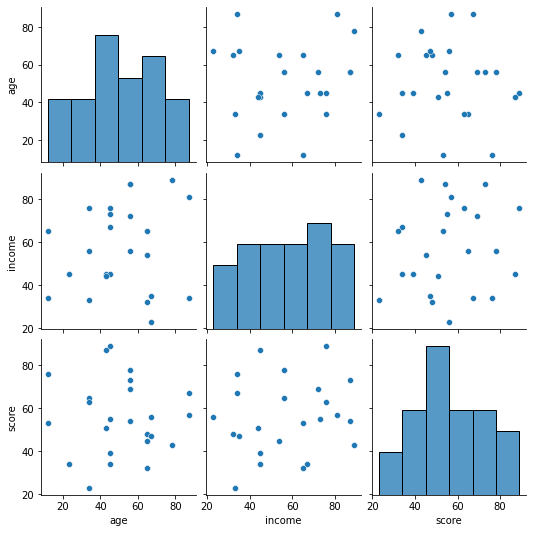

In [110]:
seaborn.pairplot(df[['age','income','score']])

In [112]:
import sklearn.cluster as cluster

In [114]:
Kmeans = cluster.KMeans(n_clusters=5)

In [117]:
Kmeans = Kmeans.fit(df[['income','score']])

In [118]:
Kmeans.cluster_centers_

array([[45.   , 74.6  ],
       [66.   , 33.   ],
       [38.875, 42.875],
       [79.   , 52.4  ],
       [77.75 , 73.5  ]])

In [120]:
df['income_cluster']=Kmeans.labels_

In [121]:
df

,customer ID,gender,age,income,score,income_cluster
0,1,female,34,33,23,2
1,2,female,23,45,34,2
2,4,female,45,67,34,1
3,5,male,65,54,45,2
4,6,male,67,23,56,2
5,7,female,87,34,67,0
6,8,male,56,56,78,0
7,9,female,45,76,89,4
8,10,male,43,45,87,0
9,11,female,12,34,76,0


In [123]:
df['income_cluster'].value_counts()

2    8
0    5
3    5
4    4
1    2
Name: income_cluster, dtype: int64

<AxesSubplot:xlabel='score', ylabel='income'>

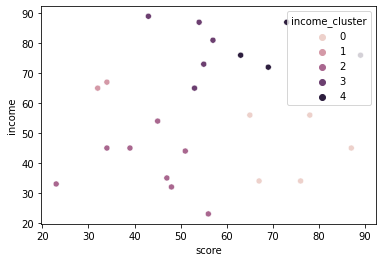

In [125]:
seaborn.scatterplot(x='score',y='income',hue='income_cluster',data=df)

In [126]:
Kmeans = cluster.KMeans(n_clusters=2)

In [128]:
Kmeans = Kmeans.fit(df[['age','score']])

In [129]:
Kmeans.cluster_centers_

array([[38.25      , 66.08333333],
       [63.41666667, 45.41666667]])

In [130]:
df['age_cluster']=Kmeans.labels_

In [131]:
df

,customer ID,gender,age,income,score,income_cluster,age_cluster
0,1,female,34,33,23,2,1
1,2,female,23,45,34,2,0
2,4,female,45,67,34,1,1
3,5,male,65,54,45,2,1
4,6,male,67,23,56,2,1
5,7,female,87,34,67,0,1
6,8,male,56,56,78,0,0
7,9,female,45,76,89,4,0
8,10,male,43,45,87,0,0
9,11,female,12,34,76,0,0


In [132]:
df['age_cluster'].value_counts()

1    12
0    12
Name: age_cluster, dtype: int64

<AxesSubplot:xlabel='score', ylabel='age'>

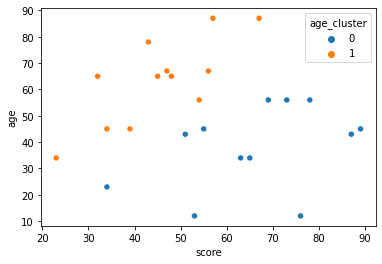

In [133]:
seaborn.scatterplot(x='score',y='age',hue='age_cluster',data=df)

In [134]:
from sklearn.cluster import KMeans

In [139]:
wcss =[]
k_range=range(1,12)

In [140]:
for i in k_range:
    Kmeans = KMeans(n_clusters=i)
    temp = Kmeans.fit(df[['income','score']])
    wcss.append(temp.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [141]:
wcss

[16379.0,
 8934.833333333334,
 5534.166666666666,
 4054.7083333333335,
 3219.759523809524,
 2528.25,
 2160.9761904761904,
 1688.1666666666667,
 1447.3333333333335,
 1058.5,
 928.5833333333333]

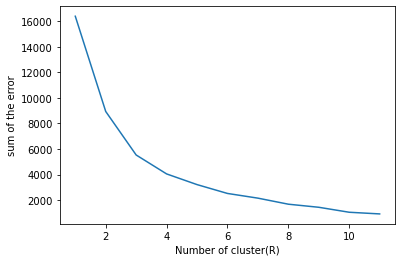

In [143]:
plt.xlabel('Number of cluster(R)')
plt.ylabel('sum of the error')
plt.plot(k_range,wcss)